In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#load and display dataframe
#df_columns = ['Checking_status', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings', 'Personal_Status_and_Sex', 'Installment_Rate', 'Personal_Status_and_Sex2', 'Age', 'Present_Residence', 'Property', 'Age2', 'Other_Installment_Plans', 'Housing', 'Existing_Credits', 'Job', 'Maintanence_Liability', 'Telephone', 'Foreign_Worker', 'Col_21', 'Col_22', 'Col_23', 'Col_24', 'Output_Classification']
df_columns = ['Checking_status', 'Duration', 'Credit_History', 'Purpose', 'Savings', 'Employment_Status', 'Personal_Status_and_Sex', 'Present_Residence', 'Property', 'Age', 'Other_Installment_Plans', 'Existing_Credits', 'Liability', 'Telephone', 'Foreign_Worker', 'Unmapped_Column_1', 'Unmapped_Column_2', 'Unmapped_Column_3', 'Unmapped_Column_4', 'Unmapped_Column_5', 'Unmapped_Column_6', 'Unmapped_Column_7', 'Unmapped_Column_8', 'Unmapped_Column_9', 'Output_Classification']
array_credit = np.loadtxt("german.data-numeric", dtype=int)

#Change output class values from [1-Good, 2-Bad] to [1-Good, 0-Bad]
array_credit[:,-1]= array_credit[:,-1] - 1
array_credit[:,-1]=np.abs(1 - array_credit[:,-1])

df_credit = pd.DataFrame(array_credit, columns = df_columns)
display(df_credit)
#display(df_credit['JobX'])


,Checking_status,Duration,Credit_History,Purpose,Savings,Employment_Status,Personal_Status_and_Sex,Present_Residence,Property,Age,...,Unmapped_Column_1,Unmapped_Column_2,Unmapped_Column_3,Unmapped_Column_4,Unmapped_Column_5,Unmapped_Column_6,Unmapped_Column_7,Unmapped_Column_8,Unmapped_Column_9,Output_Classification
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,0
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,0


In [162]:
#Check for null values by column
print(df_credit.isnull().sum())

Checking_status            0
Duration                   0
Credit_History             0
Purpose                    0
Savings                    0
Employment_Status          0
Personal_Status_and_Sex    0
Present_Residence          0
Property                   0
Age                        0
Other_Installment_Plans    0
Existing_Credits           0
Liability                  0
Telephone                  0
Foreign_Worker             0
Unmapped_Column_1          0
Unmapped_Column_2          0
Unmapped_Column_3          0
Unmapped_Column_4          0
Unmapped_Column_5          0
Unmapped_Column_6          0
Unmapped_Column_7          0
Unmapped_Column_8          0
Unmapped_Column_9          0
Output_Classification      0
dtype: int64


In [163]:
#Convert Personal Status and Sex to Personal Status
#Male - 0, Female - 1
for a in range(0,len(df_credit['Personal_Status_and_Sex'])):
    if(int(df_credit['Personal_Status_and_Sex'][a]==1) or int(df_credit['Personal_Status_and_Sex'][a])==3 or int(df_credit['Personal_Status_and_Sex'][a])==4):
        df_credit['Personal_Status_and_Sex'][a]==0
    else:
        df_credit['Personal_Status_and_Sex'][a]==1
df_credit['Personal_Status_and_Sex'] = df_credit['Personal_Status_and_Sex'].replace([1,3,4],0)
df_credit['Personal_Status_and_Sex'] = df_credit['Personal_Status_and_Sex'].replace([2,5],1)


In [164]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x = df_credit.iloc[:,:-1].values
y = df_credit.iloc[:, -1].values

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [166]:
#Training the model and calculating accuracy
#sc = StandardScaler()
#x_train_sc = sc.fit_transform(x_train)
#x_test_sc = sc.transform(x_test)

Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train, y_train)

y_pred = Classifier.predict(x_test)
print("Accuracy score of standard classifier: ", accuracy_score(y_test, y_pred))

Accuracy score of standard classifier:  0.77


C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
#Plotting confusion Matrix of default classifier
from sklearn.metrics import confusion_matrix
confusion_matrix_classifier = confusion_matrix(y_test, y_pred)
print(confusion_matrix_classifier)

[[ 49  37]
 [ 32 182]]


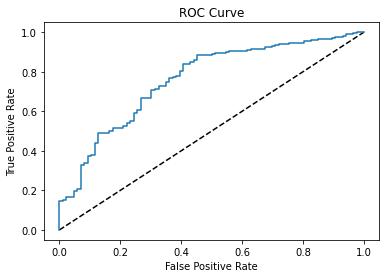

In [168]:
#Plotting ROC Curve of default classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [169]:
#Listing ROC_AUC score for default classifier
logistic_roc_auc = roc_auc_score(y_test, Classifier.predict(x_test))
print('ROC_AUC score for logistic regression classifier - ', logistic_roc_auc)

ROC_AUC score for logistic regression classifier -  0.7101173657900456


In [170]:
#########TASK2##############
#Testing Fairness Criteria#

In [171]:
#TASK 2 - ANTI-CLASSIFICATION AGE
#Test anti-classification on age by random values between (18,90) to age in the validation set
import random

x_test_random_age=x_test.copy()

for a in range(0,len(x_test_random_age)):
    x_test_random_age[a][9] = random.randint(18, 90)

y_pred_random_age = Classifier.predict(x_test_random_age)
print("Similarity score/Accuracy score for anti-classification test on age: ", accuracy_score(y_pred, y_pred_random_age))

Similarity score/Accuracy score for anti-classification test on age:  0.9833333333333333


In [172]:
#TASK 2 - ANTI-CLASSIFICATION GENDER
#Test anti-classification on gender by flipping gender from male->female or female->male in the validation set

x_test_opposite_sex=x_test.copy()

for a in range(0,len(x_test_opposite_sex)):
    if(x_test_opposite_sex[a][6]==0):
        x_test_opposite_sex[a][6]=1
    else:
        x_test_opposite_sex[a][6]=0

y_pred_opposite_sex= Classifier.predict(x_test_opposite_sex)
print("Similarity score/Accuracy score for anti-classification test on sex: ", accuracy_score(y_pred, y_pred_opposite_sex))

Similarity score/Accuracy score for anti-classification test on sex:  0.9733333333333334


In [173]:
#TASK 2 - GROUP FAIRNESS AGE
#Test group fairness on age by comparing the percentage of people classified as 'good' by the model on different age groups in the validation set

import numpy as np

validation_set_age = x_test[:,9].copy()

youth_index=[]
adults_index=[]
seniors_index=[]

for index in range(len(validation_set_age)):
    
    customer_age=validation_set_age[index]
    
    if customer_age<=24:
        youth_index.append(index)
    elif customer_age<=60:
        adults_index.append(index)
    else:
        seniors_index.append(index)

x_test_youth = x_test[youth_index,:].copy()
x_test_adults = x_test[adults_index,:].copy()
x_test_seniors = x_test[seniors_index,:].copy()

y_pred_youth= Classifier.predict(x_test_youth)
y_pred_adults= Classifier.predict(x_test_adults)
y_pred_seniors= Classifier.predict(x_test_seniors)

percentage_good_youth = (((np.array(y_pred_youth) == 1).sum())/len(y_pred_youth))*100
percentage_good_adults = (((np.array(y_pred_adults) == 1).sum())/len(y_pred_adults))*100
percentage_good_seniors = (((np.array(y_pred_seniors) == 1).sum())/len(y_pred_seniors))*100

print("Percentage of good youth predicted by the classifier is - ", percentage_good_youth)
print("Percentage of good adults predicted by the classifier is - ", percentage_good_adults)
print("Percentage of good seniors predicted by the classifier is - ", percentage_good_seniors)



Percentage of good youth predicted by the classifier is -  63.63636363636363
Percentage of good adults predicted by the classifier is -  74.39024390243902
Percentage of good seniors predicted by the classifier is -  80.0


In [174]:
#TASK 2 - GROUP FAIRNESS GENDER
#Test group fairness on gender by comparing the percentage of males and females classified as 'good' by the model on the validation set


validation_set_sex = x_test[:,6].copy()

male_index=[]
female_index=[]

for index in range(len(validation_set_sex)):
    
    customer_sex=validation_set_sex[index]
    
    if customer_sex==0:
        male_index.append(index)
    else:
        female_index.append(index)

x_test_male = x_test[male_index,:].copy()
x_test_female = x_test[female_index,:].copy()

y_pred_male= Classifier.predict(x_test_male)
y_pred_female= Classifier.predict(x_test_female)

percentage_good_male = (((np.array(y_pred_male) == 1).sum())/len(y_pred_male))*100
percentage_good_female = (((np.array(y_pred_female) == 1).sum())/len(y_pred_female))*100

print("Percentage of good males predicted by the classifier is - ", percentage_good_male)
print("Percentage of good females predicted by the classifier is - ", percentage_good_female)


Percentage of good males predicted by the classifier is -  73.9795918367347
Percentage of good females predicted by the classifier is -  71.15384615384616


In [175]:
#TASK 2 - SEPERATION AGE
#Test seperation on age by comparing the False Positive Rate among different age groups on the validation set


def return_array_vals(y_test, index_arr):
    
    temp_arr=[]
    for a in index_arr:
        temp_arr.append(y_test[a])
    return temp_arr

y_test_youth = return_array_vals(y_test, youth_index)
y_test_adults = return_array_vals(y_test, adults_index)
y_test_seniors = return_array_vals(y_test, seniors_index)

#print(y_pred_youth)

confusion_matrix_youth = confusion_matrix(y_test_youth, y_pred_youth.tolist())
confusion_matrix_adults = confusion_matrix(y_test_adults, y_pred_adults.tolist())
confusion_matrix_seniors = confusion_matrix(y_test_seniors, y_pred_seniors.tolist())

print("Confusion matrix for youth - \n", confusion_matrix_youth)
print("Confusion matrix for adults - \n", confusion_matrix_adults)
print("Confusion matrix for seniors - \n", confusion_matrix_seniors)

TN_youth,FP_youth,FN_youth,TP_youth = confusion_matrix_youth.ravel()
TN_adults,FP_adults,FN_adults,TP_adults = confusion_matrix_adults.ravel()
TN_seniors,FP_seniors,FN_seniors,TP_seniors = confusion_matrix_seniors.ravel()

FPR_youth = (FP_youth)/(FP_youth+TN_youth)
FPR_adults = (FP_adults)/(FP_adults+TN_adults)
FPR_seniors = (FP_seniors)/(FP_seniors+TN_seniors)
#print(FP_youth, FP_adults, FP_seniors)

print("FPR for youth - ", FPR_youth)
print("FPR for adults - ", FPR_adults)
print("FPR for seniors - ", FPR_seniors)


Confusion matrix for youth - 
 [[12  7]
 [ 4 21]]
Confusion matrix for adults - 
 [[ 35  30]
 [ 28 153]]
Confusion matrix for seniors - 
 [[2 0]
 [0 8]]
FPR for youth -  0.3684210526315789
FPR for adults -  0.46153846153846156
FPR for seniors -  0.0


In [176]:
#TASK 2 - SEPERATION GENDER
#Test seperation on gender by comparing the False Positive Rate among males and females on the validation set

y_test_male = return_array_vals(y_test, male_index)
y_test_female = return_array_vals(y_test, female_index)

confusion_matrix_male = confusion_matrix(y_test_male, y_pred_male.tolist())
confusion_matrix_female = confusion_matrix(y_test_female, y_pred_female.tolist())

print("Confusion matrix for male - \n", confusion_matrix_male)
print("Confusion matrix for female - \n", confusion_matrix_female)

TN_male,FP_male,FN_male,TP_male = confusion_matrix_male.ravel()
TN_female,FP_female,FN_female,TP_female = confusion_matrix_female.ravel()

FPR_male = (FP_male)/(FP_male+TN_male)
FPR_female = (FP_female)/(FP_female+TN_female)

print("FPR for males - ", FPR_male)
print("FPR for females - ", FPR_female)




Confusion matrix for male - 
 [[ 29  18]
 [ 22 127]]
Confusion matrix for female - 
 [[20 19]
 [10 55]]
FPR for males -  0.3829787234042553
FPR for females -  0.48717948717948717


In [177]:
###### TASK 3 ######
#IMPROVING FAIRNESS ON GENDER#

In [178]:
#TASK 3 - IMPROVING ANTI-CLASSIFICATION GENDER
#Improve anti-classification on gender by dropping the 'personal_status_and_sex column' and retraining the model

df_credit_anti_classification = df_credit.copy()
df_credit_anti_classification.drop('Personal_Status_and_Sex',axis=1,inplace=True)
x_anti_classification = df_credit_anti_classification.iloc[:,:-1].values
y_anti_classification = df_credit_anti_classification.iloc[:, -1].values

x_train_anti_classification, x_test_anti_classification, y_train_anti_classification, y_test_anti_classification = train_test_split(x_anti_classification, y_anti_classification, test_size=0.3, random_state=0)
Classifier_anti_classification = LogisticRegression(random_state=0)
Classifier_anti_classification.fit(x_train_anti_classification, y_train_anti_classification)

y_pred_anti_classification = Classifier_anti_classification.predict(x_test_anti_classification)
x_test_opposite_gender_anti_classification = x_test_anti_classification.copy() #Technically no opposite gender since no gender column exists
y_pred_opposite_gender_anti_classification = Classifier_anti_classification.predict(x_test_opposite_gender_anti_classification)
print("Similarity score/Accuracy score for anti-classification test on sex after dropping gender column: ", accuracy_score(y_pred_anti_classification, y_pred_opposite_gender_anti_classification))
print("Accuracy score of the modified classifier for anti-classification: ", accuracy_score(y_test_anti_classification, y_pred_anti_classification))

Similarity score/Accuracy score for anti-classification test on sex after dropping gender column:  1.0
Accuracy score of the modified classifier for anti-classification:  0.77


C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
#TASK 3 - IMPROVING GROUP-FAIRNESS GENDER
#Improve group-fairness on gender by modifying the thresholds so that similar percentage of males and females
#are classified as 'good' by the model on the validation set

validation_set_sex = x_test[:,6].copy()

# Tweaking threshold while predicting
y_pred_male_with_group_fairness = (Classifier.predict_proba(x_test_male)[:,1] >= 0.50).astype(int)
y_pred_female_with_group_fairness = (Classifier.predict_proba(x_test_female)[:,1] >= 0.45).astype(int)

percentage_good_male_with_group_fairness = (((np.array(y_pred_male_with_group_fairness) == 1).sum())/len(y_pred_male_with_group_fairness))*100
percentage_good_female_with_group_fairness = (((np.array(y_pred_female_with_group_fairness) == 1).sum())/len(y_pred_female_with_group_fairness))*100

print("Percentage of good males predicted by the modified classifier for group fairness is - ", percentage_good_male_with_group_fairness)
print("Percentage of good females predicted by the modified classifier for group fairness is - ", percentage_good_female_with_group_fairness)

accuracy_of_group_fairness_model = (len(male_index)*accuracy_score(y_pred_male_with_group_fairness,y_test_male)+len(female_index)*accuracy_score(y_pred_female_with_group_fairness,y_test_female))/(len(male_index)+len(female_index))
print("Accuracy score of the modified classifier for group-fairness:", accuracy_of_group_fairness_model)

Percentage of good males predicted by the modified classifier for group fairness is -  73.9795918367347
Percentage of good females predicted by the modified classifier for group fairness is -  74.03846153846155
Accuracy score of the modified classifier for group-fairness: 0.7666666666666667


In [180]:
#TASK 3 - IMPROVING SEPERATION GENDER
#Improve seperation on gender by finding the best threshold which
#would bring down the FPR on females to match that of males
#while maintaining model accuracy

print("FPR for females with default threshold - ", FPR_female, " FPR for males is the same - ", FPR_male)


new_female_threshold = 0
FPR_female_best_threshold=FPR_female
female_accuracy_score = 0

#loop to find the best threshold which gives FPR similar to males while maintaining accuracy
while(new_female_threshold<=1):
    
    y_pred_female_new_threshold = (Classifier.predict_proba(x_test_female)[:,1] >= new_female_threshold).astype(int)
    if accuracy_score(y_test_female, y_pred_female_new_threshold)>=accuracy_score(y_test_female, y_pred_female)-0.1:
        confusion_matrix_female_new_threshold = confusion_matrix(y_test_female, y_pred_female_new_threshold.tolist())
        TN_female_new_threshold,FP_female_new_threshold,FN_female_new_threshold,TP_female_new_threshold = confusion_matrix_female_new_threshold.ravel()
        FPR_female_new_threshold = (FP_female_new_threshold)/(FP_female_new_threshold+TN_female_new_threshold)
        
        if(abs(FPR_female_new_threshold-FPR_male)<abs(FPR_female_best_threshold-FPR_male)):
            FPR_female_best_threshold = FPR_female_new_threshold
            best_female_threshold = new_female_threshold
            female_accuracy_score = accuracy_score(y_test_female, y_pred_female_new_threshold)
    
    new_female_threshold = new_female_threshold + 0.01    

print("FPR for females with new threshold - ", FPR_female_best_threshold, " FPR for males is the same - ", FPR_male)
accuracy_of_seperation_model = (len(male_index)*accuracy_score(y_pred_male, y_test_male)+len(female_index)*female_accuracy_score)/(len(male_index)+len(female_index))
print("Accuracy score of the modified classifier for seperation:", accuracy_of_seperation_model)



FPR for females with default threshold -  0.48717948717948717  FPR for males is the same -  0.3829787234042553
FPR for females with new threshold -  0.38461538461538464  FPR for males is the same -  0.3829787234042553
Accuracy score of the modified classifier for seperation: 0.7633333333333333
